In [79]:
import json
import gzip
from zipfile import ZipFile
import pandas as pd
import pickle
from scipy.io import arff
from sklearn.utils import resample
import io
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from ipywidgets import interact, widgets

In [40]:
zip_file_path = "/content/drive/MyDrive/polish+companies+bankruptcy+data.zip"

# Open the ZIP file
with ZipFile(zip_file_path, 'r') as z:
    # List files in the ZIP archive
    file_list = z.namelist()
    print(file_list)

    arff_file_name = "2year.arff"

    # Open the ARFF file
    with z.open(arff_file_name) as arff_file:
        # Read the binary data and decode to text
        arff_data = arff_file.read().decode('utf-8')

        # Use StringIO to convert string data to file-like object
        arff_file_like = io.StringIO(arff_data)

        # Read the ARFF data
        data, meta = arff.loadarff(arff_file_like)
        df = pd.DataFrame(data)

print(df.head())
print(type(df))

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']
      Attr1    Attr2     Attr3   Attr4   Attr5     Attr6    Attr7    Attr8  \
0  0.202350  0.46500  0.240380  1.5171 -14.547  0.510690  0.25366  0.91816   
1  0.030073  0.59563  0.186680  1.3382 -37.859 -0.000319  0.04167  0.67890   
2  0.257860  0.29949  0.665190  3.2211  71.799  0.000000  0.31877  2.33200   
3  0.227160  0.67850  0.042784  1.0828 -88.212  0.000000  0.28505  0.47384   
4  0.085443  0.38039  0.359230  1.9444  21.731  0.187900  0.10823  1.37140   

     Attr9   Attr10  ...   Attr56    Attr57   Attr58   Attr59  Attr60  \
0  1.15190  0.42695  ...  0.13184  0.473950  0.86816  0.00024  8.5487   
1  0.32356  0.40437  ...  0.12146  0.074369  0.87235  0.00000  1.5264   
2  1.67620  0.69841  ...  0.16499  0.369210  0.81614  0.00000  4.3325   
3  1.32410  0.32150  ...  0.29358  0.706570  0.78617  0.48456  5.2309   
4  1.11260  0.52167  ...  0.10124  0.163790  0.89876  0.00000  5.7035   

    Attr61   Attr62  

In [41]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10172 non-null  float64
 1   Attr2   10172 non-null  float64
 2   Attr3   10172 non-null  float64
 3   Attr4   10151 non-null  float64
 4   Attr5   10149 non-null  float64
 5   Attr6   10172 non-null  float64
 6   Attr7   10172 non-null  float64
 7   Attr8   10155 non-null  float64
 8   Attr9   10169 non-null  float64
 9   Attr10  10172 non-null  float64
 10  Attr11  10172 non-null  float64
 11  Attr12  10151 non-null  float64
 12  Attr13  10110 non-null  float64
 13  Attr14  10172 non-null  float64
 14  Attr15  10161 non-null  float64
 15  Attr16  10154 non-null  float64
 16  Attr17  10155 non-null  float64
 17  Attr18  10172 non-null  float64
 18  Attr19  10109 non-null  float64
 19  Attr20  10110 non-null  float64
 20  Attr21  7009 non-null   float64
 21  Attr22  10172 non-null  float64
 22

In [43]:
# Convert the 'class' column to integer type if it's not already
df['class'] = df['class'].str.decode('utf-8').astype(int)

In [44]:
# Check the distribution of the target classes
print("Class distribution before resampling:")
print(df['class'].value_counts(normalize=True))

Class distribution before resampling:
class
0    0.96068
1    0.03932
Name: proportion, dtype: float64


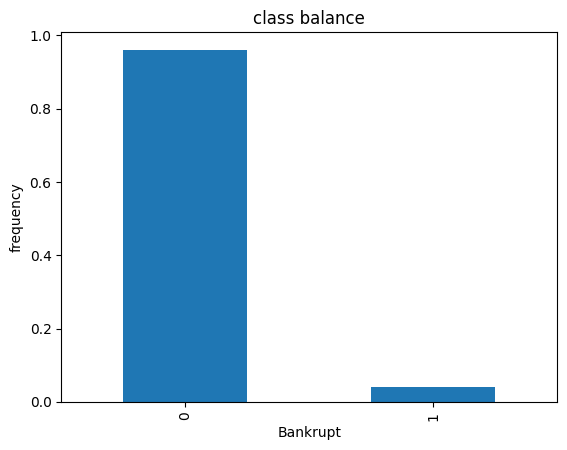

In [45]:
# Plot class balance
df["class"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bankrupt",
    ylabel="frequency",
    title="class balance"
);

In [46]:
# Identify the minority class from the original 'train' DataFrame which is to be oversampled
train_minority = df[df['class'] == 1]
print(f"Number of minority class samples (class 1): {len(train_minority)}")


Number of minority class samples (class 1): 400


**SPLIT** **DATA** **FOR** **RESAMPLING**

In [47]:
target = "class"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10173, 64)
y shape: (10173,)


In [48]:
# Create an oversampler object targeting 5000 samples for the minority class
ros = RandomOverSampler(sampling_strategy={1: 5000}, random_state=42)

# Check if the feature matrix and target vector are correctly defined
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector distribution:\n{y.value_counts()}")

# Apply the oversampler to the data
try:
    X_resampled, y_resampled = ros.fit_resample(X, y)
except ValueError as e:
    print(f"Error during oversampling: {e}")
    raise

Feature matrix shape: (10173, 64)
Target vector distribution:
class
0    9773
1     400
Name: count, dtype: int64


In [49]:
# Creating a new DataFrame from the resampled data
train_resampled = pd.DataFrame(X_resampled, columns=df.columns.drop('class'))
train_resampled['class'] = y_resampled
train_resampled.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,0
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,0
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,0
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,0
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,0


In [50]:
# Now, filter out the oversampled minority class
train_minority_oversampled = train_resampled[train_resampled['class'] == 1]

In [51]:
# Identify the majority class from the original 'train' DataFrame which is to be undersampled
train_majority = df[df['class'] == 0]  # '0' represents the majority class

# Downsample the majority class to match the number of minority class samples
train_majority_downsampled = resample(train_majority,
                                      replace=False,    # sample without replacement
                                      n_samples=5000,   # match number to minority class
                                      random_state=42) # for reproducibility


In [52]:
# Assign the newly sampled data to a new dataframe, balanced_train
balanced_train = pd.concat([train_majority_downsampled, train_minority_oversampled])

# Shuffle the dataset to randomly mix fraud and no_fraud cases
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class distribution after resampling:")
print(balanced_train['class'].value_counts())

Class distribution after resampling:
class
1    5000
0    5000
Name: count, dtype: int64


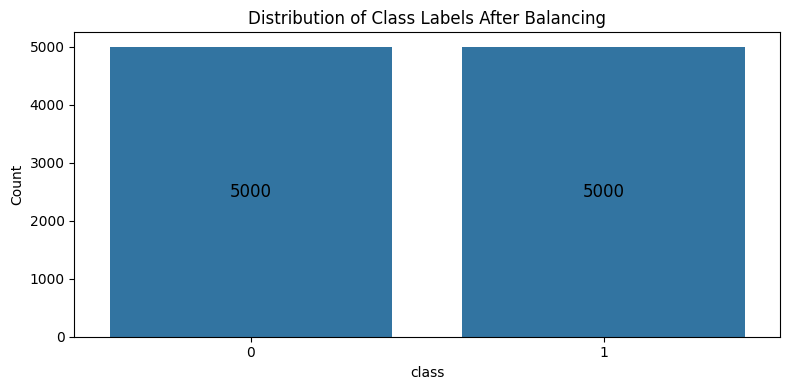

In [53]:
# Create a count plot to visualize the distribution of the target class (bankrupt)
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='class', data=balanced_train)
plt.title("Distribution of Class Labels After Balancing")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks([0, 1], [0, 1])

# Annotate each bar with the count of samples, positioned in the middle of each bar
for p in ax.patches:
    ax.annotate('5000', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

**MODEL** **BUILDING** **ON** **THE** **RESAMPLED** **DATA**

In [54]:
#feature matrix and target vector for sampled data
target = "class"
X = balanced_train.drop(columns=target)
y = balanced_train[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10000, 64)
y shape: (10000,)


In [55]:
#perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 64)
y_train shape: (8000,)
X_test shape: (2000, 64)
y_test shape: (2000,)


In [56]:
#Build a baseline model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5016


In [57]:
#classifier
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [58]:
#cross-validation with classifier using 5folds
cv_acc_scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.9975   0.996875 0.99625  0.99625  0.99125 ]


In [59]:
#dictionary with the range of hyperparameters
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)

}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [60]:
#gridsearch
model = GridSearchCV(
    clf,
    param_grid=params,
    cv = 5,
    n_jobs= -1,
    verbose= 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [61]:
# Train model
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [62]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [63]:
#accuracy score for Train and Test data
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9955


In [64]:
y_test.value_counts()

class
0    1013
1     987
Name: count, dtype: int64

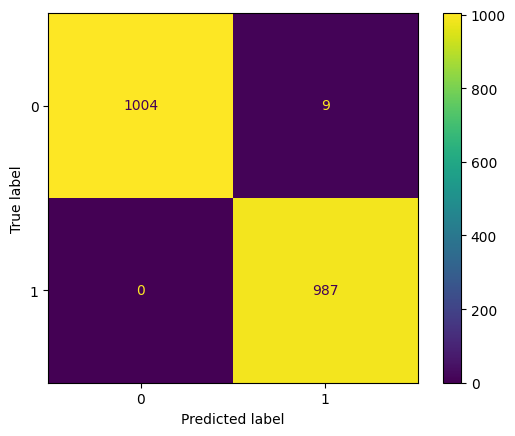

In [65]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [66]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1013
           1       0.99      1.00      1.00       987

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



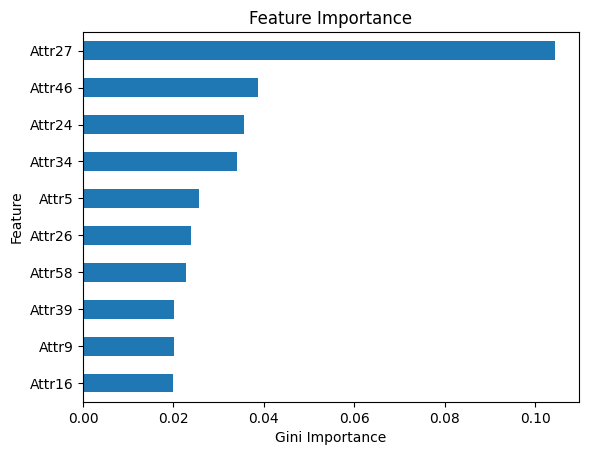

In [67]:
#check for Gini Importance
features = X_train.columns
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [71]:
#make prediction on test set
y_test_pred = model.predict(X_test)
y_test_pred[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

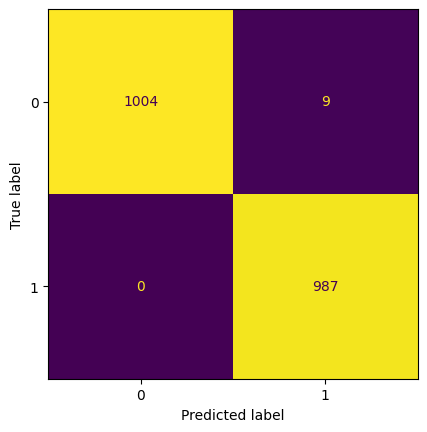

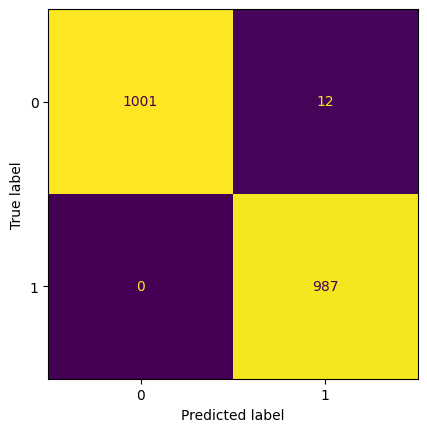

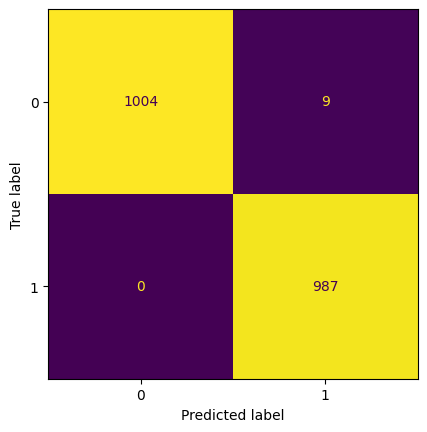

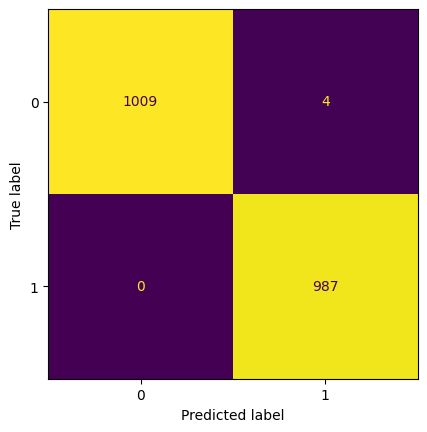

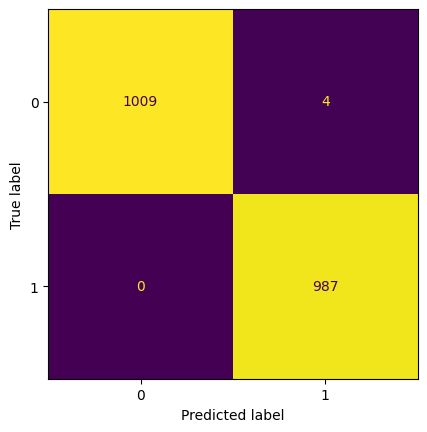

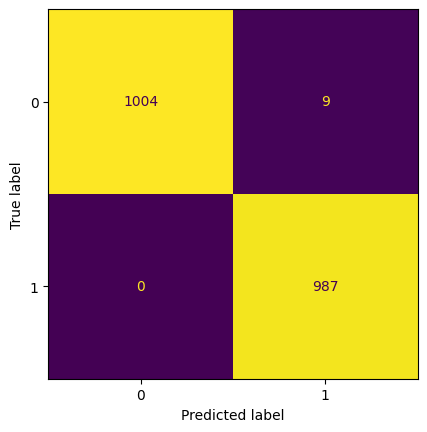

In [77]:
#interactive dashboard that shows how company profit and losses change in relationship to model's probability
def make_cnf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"profit: €{TP * 100_000_000}")
    print(f"looses: €{FP * 250_000_000}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)


thresh_widget = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.05)

interact(make_cnf_matrix, threshold=thresh_widget);

**USING** **GRADIENT** **BOOSTING** **TREES**

In [80]:
#classifier
clf = make_pipeline(
    SimpleImputer(),
     GradientBoostingClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])


In [81]:
params = {
    "simpleimputer__strategy":["mean", "median"],
    "gradientboostingclassifier__n_estimators": range(20, 31, 5),
    "gradientboostingclassifier__max_depth": range(2, 5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [82]:
model = GridSearchCV(clf,
                     param_grid=params,
                     cv=5,
                     n_jobs=-1,
                     verbose=1)

In [84]:
# Fit model to over-sampled training data
model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [85]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [86]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9262
Validation Accuracy: 0.915


In [87]:
y_test.value_counts()

class
0    1013
1     987
Name: count, dtype: int64

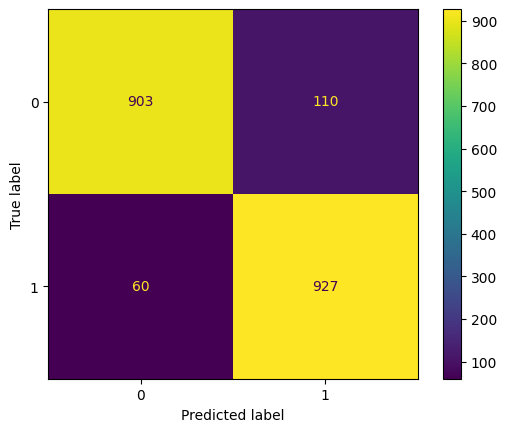

In [88]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [89]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1013
           1       0.89      0.94      0.92       987

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.91      2000
weighted avg       0.92      0.92      0.91      2000



In [92]:
# Save model
with open("model-poland.pkl", "wb") as f:
    pickle.dump(model, f)